In [1]:
import sys
sys.path.insert(0, "/media/allen/mass/CenterNet/src/lib")
import torch.utils.data as data
import numpy as np
import torch
import json
import cv2
import os
from utils.image import flip, color_aug
from utils.image import get_affine_transform, affine_transform
from utils.image import gaussian_radius, draw_umich_gaussian, draw_msra_gaussian
from utils.image import draw_dense_reg
import math
def _get_border(border, size):
    i = 1
    while size - border // i <= border // i:
        i *= 2
    return border // i

from PIL import Image 
def to_pil(cv_img):
    img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    return Image.fromarray(img)

def gaussian2D(shape, sigma=1):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1,-n:n+1]

    h = np.exp(-(x * x + y * y) / (2 * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    return h

In [3]:
img_path = "/media/allen/mass/recording/0/CAM1-2019-11-12_10-55-26_58.jpg"
img = cv2.imread(img_path)
img_h, img_w = img.shape[:2]

In [128]:
s = np.random.choice(np.arange(0.6, 1.4, 0.1))
print(s)

0.7999999999999999


In [129]:
in_h, in_w = int(img_h * s), int(img_w * s)
scale_img = cv2.resize(img, (in_w, in_h))
out_h, out_w = scale_img.shape[0] // 4, scale_img.shape[1] // 4

In [130]:
hm = np.zeros((num_classes, out_h, out_w), dtype=np.float32)
wh = np.zeros((128, 2), dtype=np.float32)
reg = np.zeros((128, 2), dtype=np.float32)
ind = np.zeros((128), dtype=np.int64)
reg_mask = np.zeros((128), dtype=np.uint8)

In [131]:
draw_gaussian = draw_umich_gaussian

In [132]:
bbox = (np.array([1688, 387, 1821, 811]) * s).astype(int)

In [133]:
bbox

array([1350,  309, 1456,  648])

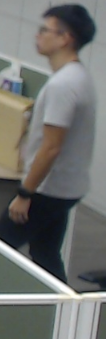

In [134]:
to_pil(scale_img[bbox[1]:bbox[3], bbox[0]:bbox[2], :])

In [135]:
ob_h, ob_w = bbox[3] - bbox[1], bbox[2] - bbox[0]
radius = gaussian_radius((ob_h, ob_w))
radius = max(0, int(radius))
radius

45

In [136]:
k = 1
bbox = bbox // 4
ct = np.array([(bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2], dtype=np.float32)
ct_int = ct.astype(np.int32)
hm[10] = draw_gaussian(hm[10], ct_int, radius)
wh[k] = 1. * ob_w, 1. * ob_h
ind[k] = ct_int[1] * out_w + ct_int[0]
reg[k] = ct - ct_int
reg_mask[k] = 1

In [137]:
hm[10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [138]:
diameter = 2 * radius + 1
gaussian = gaussian2D((diameter, diameter), sigma=diameter / 6)




In [139]:
heatmap = hm[10]
x, y = int(ct_int[0]), int(ct_int[1])

height, width = heatmap.shape[0:2]

left, right = min(x, radius), min(width - x, radius + 1)
top, bottom = min(y, radius), min(height - y, radius + 1)

masked_heatmap  = heatmap[(y - top):(y + bottom), (x - left):(x + right)]
masked_gaussian = gaussian[(radius - top):(radius + bottom), (radius - left):(radius + right)]
if min(masked_gaussian.shape) > 0 and min(masked_heatmap.shape) > 0: # TODO debug
    np.maximum(masked_heatmap, masked_gaussian * k, out=masked_heatmap)


In [159]:
masked_heatmap.min()

0.00015023879

In [118]:
gaussian[(radius - top):(radius + bottom), (radius - left):(radius + right)]

array([], shape=(0, 0), dtype=float64)

In [100]:
gt_det.append([ct[0] - w / 2, ct[1] - h / 2, 
                       ct[0] + w / 2, ct[1] + h / 2, 1, cls_id])

array([0.5, 0.5])

In [ ]:

if ob_h > 0 and w > 0:
    radius = gaussian_radius(ob_h, ob_w))
    radius = max(0, int(radius))
    radius = self.opt.hm_gauss if self.opt.mse_loss else radius
    ct = np.array(
      [(bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2], dtype=np.float32)
    ct_int = ct.astype(np.int32)
    draw_gaussian(hm[cls_id], ct_int, radius)
    wh[k] = 1. * w, 1. * h
    ind[k] = ct_int[1] * output_w + ct_int[0]
    reg[k] = ct - ct_int
    reg_mask[k] = 1
    cat_spec_wh[k, cls_id * 2: cls_id * 2 + 2] = wh[k]
    cat_spec_mask[k, cls_id * 2: cls_id * 2 + 2] = 1
    if self.opt.dense_wh:
      draw_dense_reg(dense_wh, hm.max(axis=0), ct_int, wh[k], radius)
    gt_det.append([ct[0] - w / 2, ct[1] - h / 2, 
                   ct[0] + w / 2, ct[1] + h / 2, 1, cls_id])

In [10]:
c/4

array([301.32648, 134.34888], dtype=float32)

In [104]:
import sys
sys.path.insert(0, "/media/allen/mass/CenterNet/src/lib")
import torch.utils.data as data
import numpy as np
import torch
import json
import cv2
import os
from utils.image import flip, color_aug
from utils.image import get_affine_transform, affine_transform
from utils.image import gaussian_radius, draw_umich_gaussian, draw_msra_gaussian
from utils.image import draw_dense_reg
import math


#     img_id = self.images[index]
#     file_name = self.coco.loadImgs(ids=[img_id])[0]['file_name']
img_path = "/media/allen/mass/recording/0/CAM1-2019-11-12_10-55-26_58.jpg"
#     ann_ids = self.coco.getAnnIds(imgIds=[img_id])
#     anns = self.coco.loadAnns(ids=ann_ids)
num_objs = 1

img = cv2.imread(img_path)
height, width = img.shape[0], img.shape[1] 
long_side = np.max([height, width])
canvas = np.zeros([long_side, long_side, 3])
h_offset, w_offset = int((long_side-height)/2), int((long_side-width)/2)
canvas[h_offset:(height+h_offset), w_offset:(width+w_offset), :] = img
img = canvas.astype(np.uint8)   
scale = 512 / long_side
img = cv2.resize(img, (512, 512))
height, width = img.shape[0], img.shape[1] 
c = np.array([img.shape[1] / 2., img.shape[0] / 2.], dtype=np.float32)

input_h = (height | 0) + 1
input_w = (width | 0) + 1
s = np.array([input_w, input_h], dtype=np.float32)        


sf = 0.4
cf = 0.1
c[0] = c[0] + s[0] * np.clip(np.random.randn()*cf, -2*cf, 2*cf)
c[1] = c[1] + s[1] * np.clip(np.random.randn()*cf, -2*cf, 2*cf)
s = s * np.clip(np.random.randn()*sf + 1, 1 - sf, 1 + sf)


trans_input = get_affine_transform(c, s, 0, [input_w, input_h])

inp = cv2.warpAffine(img, trans_input, 
                     (input_w, input_h),
                     flags=cv2.INTER_LINEAR)

output_h = input_h // 4
output_w = input_w // 4
num_classes = 5
trans_output = get_affine_transform(c, s, 0, [output_w, output_h])

hm = np.zeros((num_classes, output_h, output_w), dtype=np.float32)
wh = np.zeros((128, 2), dtype=np.float32)
dense_wh = np.zeros((2, output_h, output_w), dtype=np.float32)
reg = np.zeros((128, 2), dtype=np.float32)
ind = np.zeros((128), dtype=np.int64)
reg_mask = np.zeros((128), dtype=np.uint8)

draw_gaussian = draw_umich_gaussian

gt_det = []
for k in range(num_objs):

    bbox = np.array([1688, 387, 1821, 811])
    bbox[[0, 2]] += w_offset
    bbox[[1, 3]] += h_offset
    bbox = (bbox * scale).astype(int)
    cls_id = 1
#             if flipped:
#                 bbox[[0, 2]] = width - bbox[[2, 0]] - 1
    bbox[:2] = affine_transform(bbox[:2], trans_output)
    bbox[2:] = affine_transform(bbox[2:], trans_output)
    bbox[[0, 2]] = np.clip(bbox[[0, 2]], 0, output_w - 1)
    bbox[[1, 3]] = np.clip(bbox[[1, 3]], 0, output_h - 1)
    h, w = bbox[3] - bbox[1], bbox[2] - bbox[0]
    if h > 0 and w > 0:
        radius = gaussian_radius((math.ceil(h), math.ceil(w)))
        radius = max(0, int(radius))
        ct = np.array(
          [(bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2], dtype=np.float32)
        ct_int = ct.astype(np.int32)
        draw_gaussian(hm[cls_id], ct_int, radius)
        wh[k] = 1. * w, 1. * h
        ind[k] = ct_int[1] * output_w + ct_int[0]
        reg[k] = ct - ct_int
        reg_mask[k] = 1
        
ret = {'input': inp, 'hm': hm, 'reg_mask': reg_mask, 'ind': ind, 'wh': wh}        


In [1]:
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
import pycocotools.coco as coco
import os.path as osp
from tools.logger import setup_logger
logger = setup_logger(".")
from data import data_manager
from data.build_data import build_DFKP_dataset
# from data.sampler import IdBasedSampler
# from data.build_transform import build_transform
# from torch.utils import data
from config.config_manager import _C as cfg
cfg.merge_from_file('../keypoint.yml')
cfg.DATASET.TRAIN_PATH = '/media/allen/mass/DeepFashion'
cfg.TASK = 'reid'
cfg.MODEL.NUM_CLASSES = 5297
cfg.EVALUATE = '../caffe_models/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.7096.pth'

In [2]:
from model.managers.manager_reid_trick import TrickManager
manager = TrickManager(cfg)

2019-11-21 09:13:18,300 logger INFO: Evaluating model from ../caffe_models/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.7096.pth
2019-11-21 09:13:18,947 logger INFO: opt_0 is skipped
2019-11-21 09:13:18,950 logger INFO: opt_1 is skipped
2019-11-21 09:13:18,980 logger INFO: model backbone.conv1.conv.weight                              ...... loaded
2019-11-21 09:13:18,982 logger INFO: model backbone.conv1.bn.weight                                ...... loaded
2019-11-21 09:13:18,983 logger INFO: model backbone.conv1.bn.bias                                  ...... loaded
2019-11-21 09:13:18,984 logger INFO: model backbone.conv1.bn.running_mean                          ...... loaded
2019-11-21 09:13:18,985 logger INFO: model backbone.conv1.bn.running_var                           ...... loaded
2019-11-21 09:13:18,987 logger INFO: model backbone.conv2.0.conv1.conv.weight                      ...... loaded
2019-11-21 09:13:18,988 logger 

2019-11-21 09:13:19,052 logger INFO: model backbone.conv2.0.conv2d.3.conv1.weight                  ...... loaded
2019-11-21 09:13:19,053 logger INFO: model backbone.conv2.0.conv2d.3.conv2.weight                  ...... loaded
2019-11-21 09:13:19,054 logger INFO: model backbone.conv2.0.conv2d.3.bn.weight                     ...... loaded
2019-11-21 09:13:19,056 logger INFO: model backbone.conv2.0.conv2d.3.bn.bias                       ...... loaded
2019-11-21 09:13:19,057 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_mean               ...... loaded
2019-11-21 09:13:19,058 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_var                ...... loaded
2019-11-21 09:13:19,059 logger INFO: model backbone.conv2.0.gate.fc1.weight                        ...... loaded
2019-11-21 09:13:19,060 logger INFO: model backbone.conv2.0.gate.fc1.bias                          ...... loaded
2019-11-21 09:13:19,061 logger INFO: model backbone.conv2.0.gate.fc2.weight                     

2019-11-21 09:13:19,120 logger INFO: model backbone.conv2.1.conv2d.1.conv1.weight                  ...... loaded
2019-11-21 09:13:19,121 logger INFO: model backbone.conv2.1.conv2d.1.conv2.weight                  ...... loaded
2019-11-21 09:13:19,122 logger INFO: model backbone.conv2.1.conv2d.1.bn.weight                     ...... loaded
2019-11-21 09:13:19,123 logger INFO: model backbone.conv2.1.conv2d.1.bn.bias                       ...... loaded
2019-11-21 09:13:19,124 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_mean               ...... loaded
2019-11-21 09:13:19,125 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_var                ...... loaded
2019-11-21 09:13:19,125 logger INFO: model backbone.conv2.1.conv2d.2.conv1.weight                  ...... loaded
2019-11-21 09:13:19,126 logger INFO: model backbone.conv2.1.conv2d.2.conv2.weight                  ...... loaded
2019-11-21 09:13:19,128 logger INFO: model backbone.conv2.1.conv2d.2.bn.weight                  

2019-11-21 09:13:19,188 logger INFO: model backbone.conv3.0.conv2c.2.conv1.weight                  ...... loaded
2019-11-21 09:13:19,189 logger INFO: model backbone.conv3.0.conv2c.2.conv2.weight                  ...... loaded
2019-11-21 09:13:19,189 logger INFO: model backbone.conv3.0.conv2c.2.bn.weight                     ...... loaded
2019-11-21 09:13:19,190 logger INFO: model backbone.conv3.0.conv2c.2.bn.bias                       ...... loaded
2019-11-21 09:13:19,191 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_mean               ...... loaded
2019-11-21 09:13:19,191 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_var                ...... loaded
2019-11-21 09:13:19,195 logger INFO: model backbone.conv3.0.conv2d.0.conv1.weight                  ...... loaded
2019-11-21 09:13:19,196 logger INFO: model backbone.conv3.0.conv2d.0.conv2.weight                  ...... loaded
2019-11-21 09:13:19,197 logger INFO: model backbone.conv3.0.conv2d.0.bn.weight                  

2019-11-21 09:13:19,266 logger INFO: model backbone.conv3.1.conv2c.0.conv1.weight                  ...... loaded
2019-11-21 09:13:19,267 logger INFO: model backbone.conv3.1.conv2c.0.conv2.weight                  ...... loaded
2019-11-21 09:13:19,268 logger INFO: model backbone.conv3.1.conv2c.0.bn.weight                     ...... loaded
2019-11-21 09:13:19,269 logger INFO: model backbone.conv3.1.conv2c.0.bn.bias                       ...... loaded
2019-11-21 09:13:19,270 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_mean               ...... loaded
2019-11-21 09:13:19,270 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_var                ...... loaded
2019-11-21 09:13:19,271 logger INFO: model backbone.conv3.1.conv2c.1.conv1.weight                  ...... loaded
2019-11-21 09:13:19,272 logger INFO: model backbone.conv3.1.conv2c.1.conv2.weight                  ...... loaded
2019-11-21 09:13:19,273 logger INFO: model backbone.conv3.1.conv2c.1.bn.weight                  

2019-11-21 09:13:19,322 logger INFO: model backbone.conv4.0.conv2b.0.conv1.weight                  ...... loaded
2019-11-21 09:13:19,323 logger INFO: model backbone.conv4.0.conv2b.0.conv2.weight                  ...... loaded
2019-11-21 09:13:19,324 logger INFO: model backbone.conv4.0.conv2b.0.bn.weight                     ...... loaded
2019-11-21 09:13:19,325 logger INFO: model backbone.conv4.0.conv2b.0.bn.bias                       ...... loaded
2019-11-21 09:13:19,326 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_mean               ...... loaded
2019-11-21 09:13:19,327 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_var                ...... loaded
2019-11-21 09:13:19,328 logger INFO: model backbone.conv4.0.conv2b.1.conv1.weight                  ...... loaded
2019-11-21 09:13:19,329 logger INFO: model backbone.conv4.0.conv2b.1.conv2.weight                  ...... loaded
2019-11-21 09:13:19,329 logger INFO: model backbone.conv4.0.conv2b.1.bn.weight                  

2019-11-21 09:13:19,380 logger INFO: model backbone.conv4.0.downsample.bn.running_var              ...... loaded
2019-11-21 09:13:19,381 logger INFO: model backbone.conv4.1.conv1.conv.weight                      ...... loaded
2019-11-21 09:13:19,382 logger INFO: model backbone.conv4.1.conv1.bn.weight                        ...... loaded
2019-11-21 09:13:19,383 logger INFO: model backbone.conv4.1.conv1.bn.bias                          ...... loaded
2019-11-21 09:13:19,383 logger INFO: model backbone.conv4.1.conv1.bn.running_mean                  ...... loaded
2019-11-21 09:13:19,384 logger INFO: model backbone.conv4.1.conv1.bn.running_var                   ...... loaded
2019-11-21 09:13:19,385 logger INFO: model backbone.conv4.1.conv2a.conv1.weight                    ...... loaded
2019-11-21 09:13:19,386 logger INFO: model backbone.conv4.1.conv2a.conv2.weight                    ...... loaded
2019-11-21 09:13:19,386 logger INFO: model backbone.conv4.1.conv2a.bn.weight                    

2019-11-21 09:13:19,439 logger INFO: model backbone.conv4.1.gate.fc1.bias                          ...... loaded
2019-11-21 09:13:19,440 logger INFO: model backbone.conv4.1.gate.fc2.weight                        ...... loaded
2019-11-21 09:13:19,441 logger INFO: model backbone.conv4.1.gate.fc2.bias                          ...... loaded
2019-11-21 09:13:19,442 logger INFO: model backbone.conv4.1.conv3.conv.weight                      ...... loaded
2019-11-21 09:13:19,444 logger INFO: model backbone.conv4.1.conv3.bn.weight                        ...... loaded
2019-11-21 09:13:19,445 logger INFO: model backbone.conv4.1.conv3.bn.bias                          ...... loaded
2019-11-21 09:13:19,446 logger INFO: model backbone.conv4.1.conv3.bn.running_mean                  ...... loaded
2019-11-21 09:13:19,447 logger INFO: model backbone.conv4.1.conv3.bn.running_var                   ...... loaded
2019-11-21 09:13:19,448 logger INFO: model backbone.conv5.conv.weight                           

In [26]:
manager.model

Model(
  (backbone): OSNet(
    (conv1): ConvLayer(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn): InPlaceABN(64, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu[0.01])
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (conv2): Sequential(
      (0): OSBlock(
        (conv1): Conv1x1(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): InPlaceABN(64, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu[0.01])
        )
        (conv2a): LightConv3x3(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (bn): InPlaceABN(64, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu[0.01])
        )
        (conv2b): Sequential(
          (0): LightConv3x3(
            (conv1):

In [2]:
deepfashion = data_manager.init_img_dataset(cfg)

loading annotations into memory...
Done (t=9.41s)
creating index...
index created!
2019-11-20 13:18:10,700 logger INFO: => DeepFashion2 is loaded
2019-11-20 13:18:10,701 logger INFO: Dataset statistics:
2019-11-20 13:18:10,702 logger INFO:   -------------------
2019-11-20 13:18:10,703 logger INFO:   subset   | # images
2019-11-20 13:18:10,704 logger INFO:   -------------------
2019-11-20 13:18:10,704 logger INFO:   val      |    32153
2019-11-20 13:18:10,705 logger INFO:   -------------------


In [3]:
dataset = build_DFKP_dataset(deepfashion.val_handle, deepfashion.val_images, src=deepfashion.val_dir, split='train')

In [4]:
dataset[0]

{'input': array([[[-0.41176468, -0.41176468, -0.41960782, ..., -1.        ,
          -1.        , -1.        ],
         [-0.41176468, -0.40392154, -0.41176468, ..., -1.        ,
          -1.        , -1.        ],
         [-0.41176468, -0.3960784 , -0.40392154, ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [ 0.05882359,  0.05882359,  0.06666672, ..., -1.        ,
          -1.        , -1.        ],
         [ 0.06666672,  0.06666672,  0.06666672, ..., -1.        ,
          -1.        , -1.        ],
         [ 0.07450986,  0.06666672,  0.07450986, ..., -1.        ,
          -1.        , -1.        ]],
 
        [[-0.3333333 , -0.3333333 , -0.34117645, ..., -1.        ,
          -1.        , -1.        ],
         [-0.3333333 , -0.32549018, -0.3333333 , ..., -1.        ,
          -1.        , -1.        ],
         [-0.3333333 , -0.31764704, -0.32549018, ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [ 0.14509809,  

In [6]:
import torch
loader = torch.utils.data.DataLoader(
    dataset, 
    batch_size=10, shuffle=False, num_workers=1, pin_memory=True)

batch = next(iter(loader))

In [7]:
batch

{'input': tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -0.6000, -0.5922, -0.5922],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6000, -0.5922, -0.5843],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6000, -0.5922, -0.5843],
           ...,
           [-1.0000, -1.0000, -1.0000,  ...,  0.0118,  0.0118,  0.0118],
           [-1.0000, -1.0000, -1.0000,  ...,  0.0196,  0.0196,  0.0196],
           [-1.0000, -1.0000, -1.0000,  ...,  0.0275,  0.0353,  0.0353]],
 
          [[-1.0000, -1.0000, -1.0000,  ..., -0.5451, -0.5373, -0.5294],
           [-1.0000, -1.0000, -1.0000,  ..., -0.5373, -0.5294, -0.5216],
           [-1.0000, -1.0000, -1.0000,  ..., -0.5373, -0.5294, -0.5216],
           ...,
           [-1.0000, -1.0000, -1.0000,  ...,  0.1529,  0.1529,  0.1529],
           [-1.0000, -1.0000, -1.0000,  ...,  0.1529,  0.1608,  0.1608],
           [-1.0000, -1.0000, -1.0000,  ...,  0.1686,  0.1686,  0.1765]],
 
          [[-1.0000, -1.0000, -1.0000,  ..., -0.4039, -0.3961, -0.3961],
    

In [4]:
import pycocotools.coco as coco
import os.path as osp
from tools.logger import setup_logger
logger = setup_logger(".")

class DeepFashion2():
    def __init__(self, cfg):
        self.dataset_dir = cfg.DATASET.TRAIN_PATH       
        self.train_dir = osp.join(self.dataset_dir, "train/image")
        self.val_dir = osp.join(self.dataset_dir, "validation/image")
        self.train_anno = osp.join(self.dataset_dir, "deepfashion2_train.json")
        self.val_anno = osp.join(self.dataset_dir, "deepfashion2_validation.json")
        self._check_before_run()
        
#         train_handle, train_images, train_num_samples = self._process_dir(self.train_anno)
        val_handle, val_images, val_num_samples = self._process_dir(self.val_anno)
        
        logger.info("=> DeepFashion2 is loaded")
        logger.info("Dataset statistics:")
        logger.info("  -------------------")
        logger.info("  subset   | # images")
        logger.info("  -------------------")
#         logger.info("  train    | {:8d}".format(train_num_samples))
        logger.info("  val      | {:8d}".format(val_num_samples))
        logger.info("  -------------------")
        
#         self.train_handle = train_handle
        self.val_handle = val_handle
#         self.train_images = train_images
        self.val_images = val_images
        
    def _check_before_run(self):
        """Check if all files are available before going deeper"""
        if not osp.exists(self.dataset_dir):
            raise RuntimeError("'{}' is not available".format(self.dataset_dir))
        if not osp.exists(self.val_dir):
            raise RuntimeError("'{}' is not available".format(self.val_dir))
#         if not osp.exists(self.train_dir):
#             raise RuntimeError("'{}' is not available".format(self.train_dir))
        if not osp.exists(self.val_anno):
            raise RuntimeError("'{}' is not available".format(self.val_anno))
#         if not osp.exists(self.train_anno):
#             raise RuntimeError("'{}' is not available".format(self.train_anno))
    
    def _process_dir(self, path):
        data_handle = coco.COCO(path)
        image_ids = data_handle.getImgIds()  
        images = []
        for img_id in image_ids:
            idxs = data_handle.getAnnIds(imgIds=[img_id])
            for idx in idxs:
                images.append((img_id, idx))       
        num_samples = len(images)
        
        return data_handle, images, num_samples
        

In [46]:
class DeepFashion2KP(data.Dataset):
    def __init__(self, data_handle, data, src, split):
        super(DeepFashion2KP, self).__init__()
        self.coco = data_handle
        cats = self.coco.loadCats(self.coco.getCatIds())
        self.num_classes = len(cats)
        self.num_joints = 294
        self.max_object = 2
        self.default_res = (512, 512)    
        self.images = data
        self.src = src
        self.split = split
        
    def _coco_box_to_bbox(self, box):
        bbox = np.array([box[0], box[1], box[0] + box[2], box[1] + box[3]],
                        dtype=np.float32)
        return bbox

    def _prerocessing(self, path):
        img = cv2.imread(path)
        height, width = img.shape[:2]         
        long_side = np.max(img.shape[:2])
        canvas = np.zeros([long_side, long_side, 3])
        h_offset, w_offset = int((long_side-height)/2), int((long_side-width)/2)
        canvas[h_offset:(height+h_offset), w_offset:(width+w_offset), :] = img
        img = canvas.astype(np.uint8)   
        scale = self.default_res[0] / long_side        
        img = cv2.resize(img, self.default_res) 
        
        return img, w_offset, h_offset, scale
    
    def __len__(self):
        return len(self.images)
        
    def __getitem__(self, index):
        img_id, ann_id = self.images[index]
        fname = self.coco.loadImgs(ids=[img_id])[0]['file_name']
        img_path = osp.join(self.src, fname)
        anns = self.coco.loadAnns(ids=[ann_id])
        num_objs = 1
        

        if self.split == 'train':
            # keep aspect ratio to resize to default resolution
            img, w_offset, h_offset, scale = self._prerocessing(img_path)
            height, width = img.shape[0], img.shape[1]
            c = np.array([img.shape[1] / 2., img.shape[0] / 2.], dtype=np.float32)
            s = max(img.shape[0], img.shape[1]) * 1.0
            sf = 0.4
            cf = 0.1
            c[0] = c[0] + s * np.clip(np.random.randn()*cf, -2*cf, 2*cf)
            c[1] = c[1] + s * np.clip(np.random.randn()*cf, -2*cf, 2*cf)
            s = s * np.clip(np.random.randn()*sf + 1, 1 - sf, 1 + sf)     

            trans_input = get_affine_transform(c, s, 0, self.default_res)
            inp = cv2.warpAffine(img, trans_input, self.default_res, flags=cv2.INTER_LINEAR)
            img = inp.copy()
            # [-1,1]
            inp = (inp.astype(np.float32) / 255.)
            inp = (inp - 0.5) / 0.5
            # HWC => CHW
            inp = inp.transpose(2, 0, 1)

            output_res = self.default_res[0] // 4
            num_joints = self.num_joints
            num_classes = self.num_classes
            trans_output = get_affine_transform(c, s, 0, [output_res, output_res])
            
            # center, object heatmap
            hm             = np.zeros((num_classes, output_res, output_res), dtype=np.float32)
            # size
            wh = np.zeros((num_objs, 2), dtype=np.float32)
            # offset
            reg            = np.zeros((num_objs, 2), dtype=np.float32)
            reg_mask       = np.zeros((num_objs), dtype=np.uint8)
            
            ind            = np.zeros((num_objs), dtype=np.int64)
            
            # human pose heatmap
            hm_hp          = np.zeros((num_joints , output_res, output_res), dtype=np.float32)    
            # humna pose offset
            hp_offset      = np.zeros((num_objs * num_joints, 2), dtype=np.float32)
            # human pose location relative to center
            kps            = np.zeros((num_objs, num_joints * 2), dtype=np.float32)
            kps_mask       = np.zeros((num_objs, num_joints * 2), dtype=np.uint8)
            
            hp_ind         = np.zeros((num_objs * num_joints), dtype=np.int64)
            hp_mask        = np.zeros((num_objs * num_joints), dtype=np.int64)            
            
            
            draw_gaussian = draw_umich_gaussian

            gt_det = []
            for k in range(num_objs):
                ann = anns[k]
                bbox = self._coco_box_to_bbox(ann['bbox'])
                bbox[[0, 2]] += w_offset
                bbox[[1, 3]] += h_offset
                bbox *= scale

                cls_id = int(ann['category_id']) - 1
                pts = np.array(ann['keypoints'], np.float32).reshape(num_joints, 3)
                pts[:,0] += w_offset
                pts[:,1] += h_offset
                pts[:,:2] *= scale

                bbox[:2] = affine_transform(bbox[:2], trans_output)
                bbox[2:] = affine_transform(bbox[2:], trans_output)
                bbox = np.clip(bbox, 0, output_res - 1)
                h, w = bbox[3] - bbox[1], bbox[2] - bbox[0]
                
                if h > 0 and w > 0:
                    radius = gaussian_radius((math.ceil(h), math.ceil(w)))
                    radius = max(0, int(radius))
                    ct = np.array([(bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2], dtype=np.float32)
                    ct_int = ct.astype(np.int32)
                    wh[k] = 1. * w, 1. * h
                    ind[k] = ct_int[1] * output_res + ct_int[0]
                    reg[k] = ct - ct_int
                    reg_mask[k] = 1
                    num_kpts = pts[:, 2].sum()
                    if num_kpts == 0:
                        hm[cls_id, ct_int[1], ct_int[0]] = 0.9999
                        reg_mask[k] = 0

                    hp_radius = gaussian_radius((math.ceil(h), math.ceil(w)))
                    hp_radius = max(0, int(hp_radius)) 
                    for j in range(num_joints):
                        if pts[j, 2] > 0:
                            pts[j, :2] = affine_transform(pts[j, :2], trans_output)
                            if pts[j, 0] >= 0 and pts[j, 0] < output_res and pts[j, 1] >= 0 and pts[j, 1] < output_res:
                                kps[k, j * 2: j * 2 + 2] = pts[j, :2] - ct_int
                                kps_mask[k, j * 2: j * 2 + 2] = 1
                                pt_int = pts[j, :2].astype(np.int32)
                                hp_offset[k * num_joints + j] = pts[j, :2] - pt_int
                                hp_ind[k * num_joints + j] = pt_int[1] * output_res + pt_int[0]
                                hp_mask[k * num_joints + j] = 1
                                draw_gaussian(hm_hp[j], pt_int, hp_radius)
                    draw_gaussian(hm[cls_id], ct_int, radius)
                    
            
            ret = {   'input': inp,         'img': img,       'bbox': bbox,     'pts':pts, 'cls':cls_id,
                         'hm': hm,           'wh': wh,         'reg': reg,
                   'reg_mask': reg_mask,    'ind': ind,
                      'hm_hp': hm_hp,       'hps': kps,  'hp_offset': hp_offset,
                   'hps_mask': kps_mask, 'hp_ind': hp_ind, 'hp_mask': hp_mask}
        else:
            img = cv2.imread(img_path)
            # [-1,1]
            inp = (inp.astype(np.float32) / 255.)
            inp = (inp - 0.5) / 0.5
            # HWC => CHW
            inp = inp.transpose(2, 0, 1)

        return ret

In [3]:
deepfashion = DeepFashion2(cfg)

KeyError: "Invalid dataset, got 'deepfashion', but expected to be one of dict_keys(['imagenet', 'market1501', 'market1501_partial', 'cuhk03', 'cuhk02', 'cuhk01', 'dukemtmcreid', 'msmt17', 'msmt17_total', 'par', 'sogo', 'deepfastion'])"

In [47]:
dataset = DeepFashion2KP(deepfashion.val_handle, deepfashion.val_images, src=deepfashion.val_dir, split='train')

In [50]:
batch.keys()

dict_keys(['input', 'img', 'bbox', 'pts', 'cls', 'hm', 'wh', 'reg', 'reg_mask', 'ind', 'hm_hp', 'hps', 'hp_offset', 'hps_mask', 'hp_ind', 'hp_mask'])

In [17]:
batch['hm'][1].numpy().shape

(13, 128, 128)

In [69]:
batch['hm_hp'][0].sum(dim=0).shape

torch.Size([128, 128])

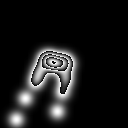

In [74]:
_hm = (batch['hm_hp'][7].sum(dim=0).numpy() * 255).astype(np.uint8)
to_pil(_hm)

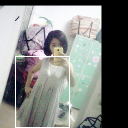

In [75]:
img = batch['img'][7].numpy()
scale_img = cv2.resize(img, (128,128))
bbox = [int(i) for i in map(int, batch['bbox'][7].numpy())]
temp = cv2.rectangle(scale_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255,255,255), 1)
to_pil(temp)

In [279]:
output = torch.rand(2,588,128,128)
ind = batch['ind']
mask = batch['hps_mask']
target = batch['hps']

In [287]:
mask.shape

torch.Size([2, 1, 588])

In [280]:
pred = _tranpose_and_gather_feat(output, ind)
mask = mask.float()
# loss = F.l1_loss(pred * mask, target * mask, reduction='elementwise_mean')
loss = torch.nn.functional.l1_loss(pred * mask, target * mask, size_average=False)

/home/allen/.pyenv/versions/3.6.8/envs/py368/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [212]:
_tranpose_and_gather_feat(batch['hm'], batch['ind'])

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [255]:
feat = torch.zeros(1,2,4,4)
# feat[0,0,0,0] = 1
feat[0,0,1,0] = 1
feat[0,1,1,0] = 1
ind = (torch.ones(1,1) * 4).long()

In [256]:
feat

tensor([[[[0., 0., 0., 0.],
          [1., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [1., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]])

In [257]:
feat = feat.permute(0, 2, 3, 1).contiguous()
feat

tensor([[[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[1., 1.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]]]])

In [258]:
feat = feat.view(feat.size(0), -1, feat.size(3))
feat

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [1., 1.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

In [259]:
dim  = feat.size(2)
ind  = ind.unsqueeze(2).expand(ind.size(0), ind.size(1), dim)
ind

tensor([[[4, 4]]])

In [262]:
ind.shape

torch.Size([1, 1, 2])

In [260]:
feat = feat.gather(1, ind)
feat

tensor([[[1., 1.]]])

In [211]:
def _gather_feat(feat, ind, mask=None):
    dim  = feat.size(2)
    ind  = ind.unsqueeze(2).expand(ind.size(0), ind.size(1), dim)
    feat = feat.gather(1, ind)
    if mask is not None:
        mask = mask.unsqueeze(2).expand_as(feat)
        feat = feat[mask]
        feat = feat.view(-1, dim)
    return feat

def _tranpose_and_gather_feat(feat, ind):
    feat = feat.permute(0, 2, 3, 1).contiguous()
    feat = feat.view(feat.size(0), -1, feat.size(3))
    feat = _gather_feat(feat, ind)
    return feat

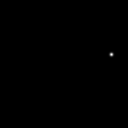

In [105]:
_hm = (hm[1] * 255).astype(np.uint8)
to_pil(_hm)

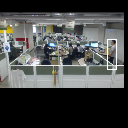

In [106]:
scale_img = cv2.resize(inp, (output_w, output_h))
temp = cv2.rectangle(scale_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255,255,255), 1)
to_pil(temp)

In [149]:
import os
import os.path as osp

In [156]:
for branch in os.listdir('/media/allen/mass/recording/'):    
    if osp.exists('/media/allen/mass/office_color/{}.csv'.format(branch)):
        continue
    
        

20000
0
10000


In [210]:
from pycocotools.coco import COCO

In [ ]:
coco = COCO("/media/allen/mass/DeepFashion/deepfashion2_train.json")